In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [25]:
# Initial conditions for Case 1 and exact solution
dir0 = 0.0  # u(0,t)= dir0
dir1 = 0.0  # u(inf,t)= dir1

# function for setting initial conditions in space
def I(x): # initial u(x,0)
    result = []
    len_x = np.size(x)
    i_x = np.zeros(len_x)
    for x_i in x:
        i_x = norm.pdf(x_i, 0, 1/(2**3))
        result.append(i_x)
    return result


In [35]:
## ====== setting parameters =======
         # final time 
Nt_gaps =   2**10  # number of timesteps
L = 2**50  # final distance
T = 1
Nt_points = Nt_gaps + 1
h = T/(Nt_points)  # time step



t = np.linspace(0.,T,Nt_points)  # times at each time step
Nx_spaces = 2*21; # number of spaces in x direction
Nx_points = Nx_spaces + 1 
L = 1; 
x_pde = np.linspace(-L, L, Nx_points)    # mesh points in space
dx = x_pde[1] - x_pde[0] 
dt = t[1] - t[0]
C = dt/(dx**2)
print("Delta x =", dx, "Delta t = ", dt, "C =", C)
##----------intialise lists ------------------------

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((Nx_points,Nt_points))

# The initial condition
U[:,0]=I(x_pde)

# enforcing the boundary condition
U[-L,0]  = dir0 
U[L,0] = dir1

Delta x = 0.04761904761904767 Delta t =  0.0009765625 C = 0.43066406249999906


In [36]:
def plotting(U,L):
    size_t = np.size(U,1)-1 # number of time steps
   
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    markers =['X','.','+','o']

    colours = ['r','g','b','purple','yellow'] # make comparison easy
    colour_pos = 0;

    N_dots = 20
    x_dots = np.linspace(0, L, N_dots+1)    # spacial points to plot exact solution at

# some arbitarily chosen time points to compare at
    for plot_pos in [0, int(size_t/10),int(size_t/5), int(size_t/2), int(size_t)]:

    # numerical solution
        label = "Numerical PDE, t=" + "%0.3f" % (t[plot_pos],)
        ax.plot(x_pde,U[:,plot_pos],color = colours[colour_pos],ls='--', label=label)
        colour_pos = colour_pos + 1;
    

    plt.xlim(0,L) # zoom in on area of interest
    ax.legend() # turn on legend 
    plt.show()

(43, 1025)


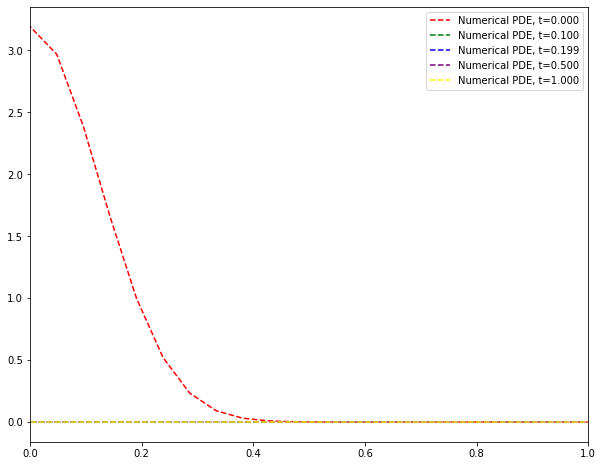

In [37]:
u_old = I(x_pde)

u = np.zeros(Nx_points)
# and to store the full solution
U = np.zeros((Nx_points,Nt_points))
U[:,0] = u_old

for n in range(1, Nt_points):
    
    # set Dirichlet boundary points here
    #...
    # compute u at inner mesh points
    for i in range(1, Nx_points-1):
        u[i] = u_old[i] + C*(u_old[i+1] - 2*u_old[i]+ u_old[i+1])
 
    # update u_old before next step
    u_old[:]= u

    # copy into full storage
    U[:,n] = u;
print(U.shape)
plotting(U,L)
